### k-Nearest Neighbor (kNN) 

The kNN classifier consists of two stages: training and testing.
During training, the classifier takes the training data and simply remembers it.
During testing, kNN classifies a test image by comparing it to all training images and selecting the majority label among the k most similar training examples.
The value of k is computed by cross-validation.
In this exercise you will implement these steps and  gain proficiency in writing efficient, vectorized code. You will select the best value of k by cross-validation. You will be using a version of the CIFAR-10 object recognition dataset for this exercise.


In [4]:
import random
import numpy as np

from imageio import imread
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [5]:
# Load the raw CIFAR-10 data.
# Run the CIFAR-10 dataset load script in the folder datasets, before you run this cell

cifar10_dir = './datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: %s' %(X_train.shape,))
print('Training labels shape: %s' %(y_train.shape,))
print('Test data shape: %s' %(X_test.shape,))
print('Test labels shape: %s' %(y_test.shape))

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: 10000


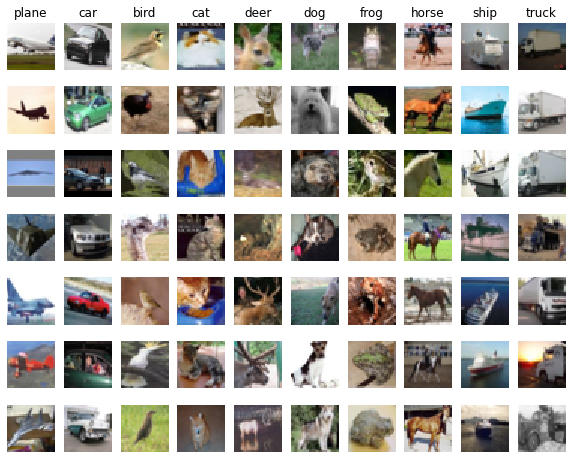

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


### Question1 : Creating a knn classifier

Remember that training a kNN classifier is a no-op. 
The classifier simply remembers the data and does no further processing, define the KNN classifier by using sklearn KNeighborsClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# TODO :: define the knn classifier, expect 2 lines of the code 

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
# TODO :: predict on test set, expect 1 line of the code
y_test_pred = classifier.predict(X_test)

In [10]:
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 139 / 500 correct => accuracy: 0.278000


### Question 2 : Choosing k by cross-validation
We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation. What is the best value for k ?

In [11]:
from sklearn.model_selection import train_test_split
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                       #
# Split up the training data into training and validation set. After splitting,#
# X_train_folds and y_train_folds should each be lists of length num_folds,    #
# where y_train_folds[i] is the label vector for the points in X_train_folds[i]#
# Hint: Look up the numpy array_split function.                                #
################################################################################
X_train_folds = np.array(np.array_split(X_train, num_folds))
y_train_folds = np.array(np.array_split(y_train, num_folds))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# A dictionary holding the accuracies for different values of k that we find
# when running validation. After running validation, k_to_accuracies[k] shold be
# the accuracy for using k value for n_neighbors
k_to_accuracies = {}

################################################################################
# TODO:                                                                        #
# Perform validation to find the best value of k. For each                     #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.  
# expect 8 lines of the code
################################################################################
for k in k_choices:
    for fold in range(num_folds):
        comb = [x for x in range(num_folds) if x != fold] 
        xres = np.concatenate(X_train_folds[comb])
        yres = np.concatenate(y_train_folds[comb])
        classifierk = KNeighborsClassifier(n_neighbors = k, n_jobs = 8)
        classifierk.fit(xres, yres)
        predictres = classifierk.predict(X_train_folds[fold])
        num_correct = np.sum(predictres == y_train_folds[fold])
        accuracy = float(num_correct) / num_test
        k_to_accuracies[k] = accuracy

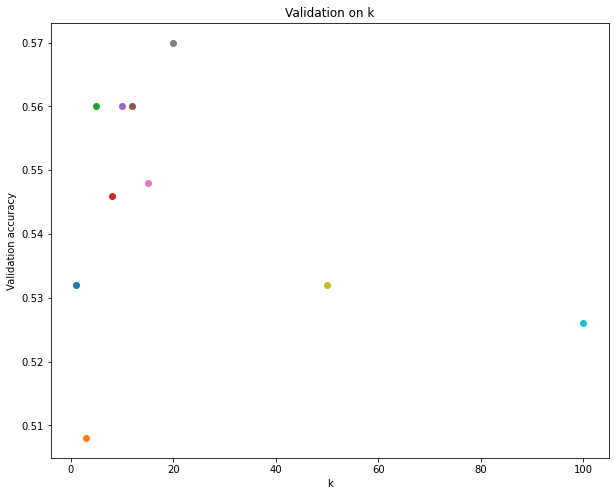

In [12]:
# plot the raw observations
for k in k_choices:
  accuracy = k_to_accuracies[k]
  plt.scatter(k, accuracy)

# plot the trend line with error bars that correspond to standard deviation
plt.title('Validation on k')
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.show()

In [13]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# TODO :: use the best k to train and predict on the test set, expect 4 lines of code
classifier = KNeighborsClassifier(n_neighbors = 10, n_jobs = 8)
classifier.fit(X_train, y_train)
y_test_predict = classifier.predict(X_test)

# TODO :: Compute and display the accuracy, expect 3 lines of code
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 0 / 500 correct => accuracy: 0.000000


<ipython-input-13-20a73239a4bf>:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  num_correct = np.sum(y_test_pred == y_test)


In [14]:
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

NameError: name 'sqrt' is not defined

In [ ]:
X_train